In [9]:
import jsonlines
from collections import Counter
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook'])

def read_jsonl(path):
    data = []
    with jsonlines.open(path, "r") as reader:
        for obj in reader:
            data.append(obj)
    return data

def _to_string(lst):
    if len(lst) == 1:
        return str(lst[0])
    elif lst == []:
        return ""
    else:
        return ";".join(lst)

path = "../data/s44k/meta.jsonl"
data = read_jsonl(path)

keys = ["variable_label", "question_text", "sub_question", "item_category", "topic"]

def make_survey_data_statistics(data):

    for key in keys:
        items = [q["variables"][k].get(key, "") for q in  data for k in q["variables"]]
        items = [_to_string(i) if isinstance(i, list) else i for i in items ]
        print(key, len(list(set(items))))

    items = [d["variables"][list(d["variables"].keys())[0]].get("year", "") for d in  data]
    items = [i for i in items if i]
    counts = Counter(items)
    print("year", len(list(set(items))))
    print(counts)
    
    return counts

In [10]:
sscoli_data = []

for d in data:
    for rd in rd_ids:
        if rd in d["url"]:
            sscoli_data.append(d)
            break
print(len(sscoli_data))

96


In [11]:
counts = make_survey_data_statistics(data)
sscoli_counts = make_survey_data_statistics(sscoli_data)

variable_label 224769
question_text 59370
sub_question 97134
item_category 50078
topic 2090
year 64
Counter({'2009': 85, '2017': 71, '2021': 65, '2002': 61, '2013': 58, '2001': 56, '2011': 56, '2020': 54, '2008': 53, '2010': 52, '2015': 51, '2016': 48, '2019': 48, '2014': 43, '2012': 42, '2018': 41, '2003': 39, '2006': 39, '2007': 37, '1994': 32, '2000': 31, '2005': 31, '1995': 29, '2004': 29, '1990': 26, '1999': 25, '1996': 22, '1998': 21, '1991': 19, '1993': 18, '2022': 17, '1992': 16, '1987': 14, '1997': 14, '1983': 11, '1982': 8, '1984': 8, '1985': 8, '1989': 8, '1976': 7, '1978': 7, '1979': 7, '1980': 7, '1986': 7, '1988': 7, '1972': 5, '1966': 4, '1970': 4, '1973': 4, '1975': 4, '1981': 4, '2023': 4, '1961': 3, '1962': 3, '1969': 3, '1971': 3, '1977': 3, '1965': 2, '1968': 2, '1974': 2, '1949': 2, '1953': 1, '1967': 1, '1957': 1})
variable_label 38123
question_text 7983
sub_question 25802
item_category 14350
topic 510
year 29
Counter({'2002': 8, '2017': 7, '2006': 6, '2010': 6, '

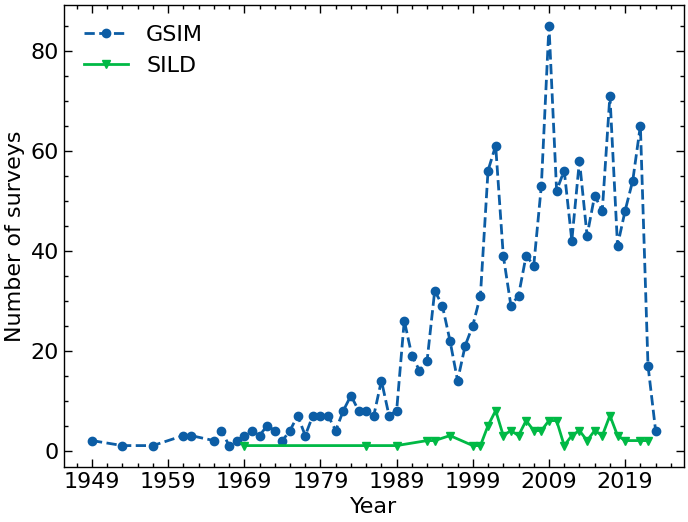

In [12]:
def get_xy(counts):
    counts = {int(k):v for k,v in counts.items()}
    sorted_counts = sorted(counts.items())
    years, frequencies = zip(*sorted_counts)
    return years, frequencies


years, frequencies = get_xy(counts)
sscoli_years, sscoli_frequencies = get_xy(sscoli_counts)

plt.plot(years, frequencies, marker='o', label="GSIM", linestyle="dashed")
plt.plot(sscoli_years, sscoli_frequencies, marker='v', label="SILD")
plt.xlabel('Year')
plt.ylabel('Number of surveys')
plt.legend()
plt.xticks(range(min(years), max(years)+1, 10))
plt.savefig("./survey-across-years.pdf")